In [310]:
import torch
import numpy as np

Tensory w PyTorchu to specjalne struktury danych które przypominają tablice/macierze. Używamy ich do przechowywania wejśc/wyjść z sieci jak również wag modelu.
Tensory przypominają swoją budową tablice numpy https://numpy.org/, z zasadniczą różnicą ktorą jest łatwa możliwość przechowywania i operowania na tensorach na kartach graficznych 

Tensory mogą być tworzone w różny sposób:
1. Ze standardowych tablic

In [311]:
data = [[1, 2],[3, 4]]
x_data = torch.tensor(data)
x_data

tensor([[1, 2],
        [3, 4]])

2. Na podstawie tablic numpy

In [312]:
np_array = np.array(data)
x_np = torch.from_numpy(np_array)
x_np

tensor([[1, 2],
        [3, 4]], dtype=torch.int32)

3. Na podstawie innych tensorów

In [313]:
x_ones = torch.ones_like(x_data) # retains the properties of x_data
print(f"Ones Tensor: \n {x_ones} \n")

x_rand = torch.rand_like(x_data, dtype=torch.float) # overrides the datatype of x_data
print(f"Random Tensor: \n {x_rand} \n")

Ones Tensor: 
 tensor([[1, 1],
        [1, 1]]) 

Random Tensor: 
 tensor([[0.9330, 0.3201],
        [0.4138, 0.4279]]) 



4. Z losowymi lub stałymi wartościami

In [314]:
shape = (2,3)
rand_tensor = torch.rand(shape)
print(f"Random Tensor: \n {rand_tensor} \n")
ones_tensor = torch.ones(shape)
print(f"Ones Tensor: \n {ones_tensor} \n")
zeros_tensor = torch.zeros(shape)
print(f"Zeros Tensor: \n {zeros_tensor} \n")

Random Tensor: 
 tensor([[0.4312, 0.5934, 0.7177],
        [0.2611, 0.9315, 0.2883]]) 

Ones Tensor: 
 tensor([[1., 1., 1.],
        [1., 1., 1.]]) 

Zeros Tensor: 
 tensor([[0., 0., 0.],
        [0., 0., 0.]]) 



### Atrybuty tensorów

In [315]:
tensor = torch.rand(3,4)

print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


### Operacje na tensorach

Nie ma co się bać dokumentacji! (Jest bardzo przyjemnie napisana) Wszystkie operacje na tensorach są opisane tutaj: https://pytorch.org/docs/stable/torch.html
Standardowo operacje są uruchamiane na CPU, ale można przenosić tensory, całe modele i **wszystkie operacje** na GPU (co zazwyczaj jest szybsze) za pomocą prostej komendy. Przetestujemy to w kolejnych częściach laboratorium

#### Standardowe indeksowanie i slicing

In [316]:
tensor = torch.ones(4, 4)
print('First row: ', tensor[0])
print('First column: ', tensor[:, 0])
print('Last column:', tensor[:, -1])
tensor[:,1] = 0
print(tensor)

First row:  tensor([1., 1., 1., 1.])
First column:  tensor([1., 1., 1., 1.])
Last column: tensor([1., 1., 1., 1.])
tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


#### Transponowanie tensorów

In [317]:
tensor = torch.ones(4, 3)
tensor[:,1] = 0
tensor[:,2] = 2
print(tensor)
print(f"Tensor shape:{tensor.shape}\n")
tensor2 = tensor.T
print(tensor2)
print(f"Transposed tensor shape:{tensor2.shape}")

tensor([[1., 0., 2.],
        [1., 0., 2.],
        [1., 0., 2.],
        [1., 0., 2.]])
Tensor shape:torch.Size([4, 3])

tensor([[1., 1., 1., 1.],
        [0., 0., 0., 0.],
        [2., 2., 2., 2.]])
Transposed tensor shape:torch.Size([3, 4])


#### Zmiana wymiarów

In [318]:
tensor = torch.ones([10])
print(tensor)
print(f"Tensor shape:{tensor.shape}\n")

tensor2 = tensor.unsqueeze(dim=0)
print(tensor2)
print(f"Tensor shape:{tensor2.shape}\n")

tensor3 = tensor.unsqueeze(dim=1)
print(tensor3)
print(f"Tensor shape:{tensor3.shape}\n")

tensor4 = tensor.view(5,2)
print(tensor4)
print(f"Tensor shape:{tensor4.shape}\n")

tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])
Tensor shape:torch.Size([10])

tensor([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])
Tensor shape:torch.Size([1, 10])

tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.]])
Tensor shape:torch.Size([10, 1])

tensor([[1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.]])
Tensor shape:torch.Size([5, 2])



#### Łączenie tensorów

In [319]:
tensor = torch.ones(4, 4)
tensor[:,1] = 0
t1 = torch.cat([tensor, tensor, tensor], dim=1)
print(t1)

tensor([[1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.]])


In [320]:
t1 = torch.cat([tensor, tensor, tensor], dim=0)
print(t1)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


In [321]:
t1 = torch.stack([tensor, tensor, tensor])
print(t1)

tensor([[[1., 0., 1., 1.],
         [1., 0., 1., 1.],
         [1., 0., 1., 1.],
         [1., 0., 1., 1.]],

        [[1., 0., 1., 1.],
         [1., 0., 1., 1.],
         [1., 0., 1., 1.],
         [1., 0., 1., 1.]],

        [[1., 0., 1., 1.],
         [1., 0., 1., 1.],
         [1., 0., 1., 1.],
         [1., 0., 1., 1.]]])


In [322]:
t1 = torch.stack([tensor, tensor, tensor],dim=0)
print(t1.shape)
t1 = torch.stack([tensor, tensor, tensor],dim=1)
print(t1.shape)
t1 = torch.stack([tensor, tensor, tensor],dim=2)
print(t1.shape)

torch.Size([3, 4, 4])
torch.Size([4, 3, 4])
torch.Size([4, 4, 3])


In [323]:
# t1 = torch.stack([tensor, tensor, tensor],dim=3)
# print(t1.shape)

#### Operacje arytmetyczne

In [324]:
print(tensor)
print(tensor+2)
print(tensor*5)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])
tensor([[3., 2., 3., 3.],
        [3., 2., 3., 3.],
        [3., 2., 3., 3.],
        [3., 2., 3., 3.]])
tensor([[5., 0., 5., 5.],
        [5., 0., 5., 5.],
        [5., 0., 5., 5.],
        [5., 0., 5., 5.]])


#### Operacje na elementach

In [325]:
tensor * tensor

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])

In [326]:
tensor + tensor

tensor([[2., 0., 2., 2.],
        [2., 0., 2., 2.],
        [2., 0., 2., 2.],
        [2., 0., 2., 2.]])

In [327]:
rand_tensor = torch.rand(4,4)*10
print(rand_tensor)
print(rand_tensor / tensor)

tensor([[0.2259, 2.6851, 8.9495, 9.8499],
        [0.5578, 9.2714, 6.9030, 4.6342],
        [4.4154, 8.0496, 1.7579, 1.4532],
        [0.8579, 5.7965, 5.2053, 4.3048]])
tensor([[0.2259,    inf, 8.9495, 9.8499],
        [0.5578,    inf, 6.9030, 4.6342],
        [4.4154,    inf, 1.7579, 1.4532],
        [0.8579,    inf, 5.2053, 4.3048]])


In [328]:
# rand_tensor = torch.rand(4,4)*10
# print(rand_tensor // tensor)
# print((tensor / tensor).type())

### Mini zadanie

Stwórz kwadratową macierz dwuwymiarową której wartości będą kolejnymi numerami od 1 do zadanej liczby x. Możesz założyć że pierwiastek kwadratowy z x jest liczbą całkowitą np. dla x=16 powinniśmy otrzymać wyjście. (Pętle są fujka :/ i zabronione)

In [329]:
import math

In [330]:
x = 25
size = int(math.sqrt(x))
test_tensor = torch.tensor(range(1, x+1)).view(size, size)
test_tensor

tensor([[ 1,  2,  3,  4,  5],
        [ 6,  7,  8,  9, 10],
        [11, 12, 13, 14, 15],
        [16, 17, 18, 19, 20],
        [21, 22, 23, 24, 25]])

Hint: https://pytorch.org/docs/stable/torch.html

### Operacje macierzowe

In [331]:
tensor = torch.ones(4, 3)
tensor[1,:] = 0
print(tensor)
print(tensor.T)

tensor([[1., 1., 1.],
        [0., 0., 0.],
        [1., 1., 1.],
        [1., 1., 1.]])
tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


In [332]:
y1 = tensor.matmul(tensor.T)
print(y1,"\n")
y2 = tensor @ tensor.T
print(y2)

tensor([[3., 0., 3., 3.],
        [0., 0., 0., 0.],
        [3., 0., 3., 3.],
        [3., 0., 3., 3.]]) 

tensor([[3., 0., 3., 3.],
        [0., 0., 0., 0.],
        [3., 0., 3., 3.],
        [3., 0., 3., 3.]])


### Zaawansowany przykład - regresja

Dla wszystkich którzy potrzebują powtórki z matmy: https://mml-book.github.io/

In [333]:
apples_kg_ordered = [2,4,7,3,13]
plums_kg_ordered = [3,8,9,1,1]
prices = [11.97 , 28.05, 38.98, 10.96, 41.1]

In [334]:
X = torch.tensor([apples_kg_ordered, plums_kg_ordered])
Y = torch.tensor(prices)
print(X)
print(Y)

tensor([[ 2,  4,  7,  3, 13],
        [ 3,  8,  9,  1,  1]])
tensor([11.9700, 28.0500, 38.9800, 10.9600, 41.1000])


In [335]:
X = X.T.float()
Y = Y.T
X

tensor([[ 2.,  3.],
        [ 4.,  8.],
        [ 7.,  9.],
        [ 3.,  1.],
        [13.,  1.]])

In [336]:
theta = torch.inverse((X.T@X))@X.T@Y
theta 

tensor([3.0065, 1.9963])

In [337]:
X @ theta

tensor([12.0020, 27.9967, 39.0126, 11.0159, 41.0810])

# Automatyczne obliczanie gradientu

Do automatycznego obliczania gradientu służy wbudowany pakiet torch.autograd, który umożliwia automatyczne obliczanie gradientu dla dowolnego grafu (ciągu obliczeń)

In [338]:
x = torch.ones(5, requires_grad=True)
print(x)

tensor([1., 1., 1., 1., 1.], requires_grad=True)


In [339]:
y = x + 2
y

tensor([3., 3., 3., 3., 3.], grad_fn=<AddBackward0>)

In [340]:
y = x * 2
y

tensor([2., 2., 2., 2., 2.], grad_fn=<MulBackward0>)

In [341]:
y = x @ x.T
y

tensor(5., grad_fn=<DotBackward0>)

In [342]:
y = x - 2
y

tensor([-1., -1., -1., -1., -1.], grad_fn=<SubBackward0>)

In [343]:
y.grad_fn.next_functions[0][0]

In [344]:
y.grad_fn.next_functions[0][0].variable

tensor([1., 1., 1., 1., 1.], requires_grad=True)

In [345]:
z = y * y * 3

In [346]:
a = z.mean()
print(z)
print(a)

tensor([3., 3., 3., 3., 3.], grad_fn=<MulBackward0>)
tensor(3., grad_fn=<MeanBackward0>)


In [347]:
from torchviz import make_dot

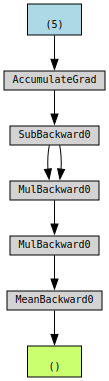

In [348]:
make_dot(a)

### Propagacja wsteczna gradientu

In [349]:
x = torch.ones(1, requires_grad=True)
print(x)
y = (x+4)**3
y

tensor([1.], requires_grad=True)


tensor([125.], grad_fn=<PowBackward0>)

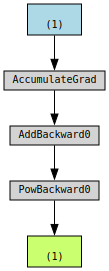

In [350]:
make_dot(y)

In [351]:
y.backward()
x.grad

tensor([75.])

#### Obliczenia z pominięciem gradientów

In [352]:
t1 = torch.rand(3,4, requires_grad=True)
t2 = torch.rand(4,3, requires_grad=True)
with torch.no_grad():
    y = t1@t2
print(y)
print(t1@t2)

tensor([[1.0001, 0.6184, 1.0857],
        [0.9101, 0.5177, 0.9626],
        [1.4244, 0.9146, 1.2735]])
tensor([[1.0001, 0.6184, 1.0857],
        [0.9101, 0.5177, 0.9626],
        [1.4244, 0.9146, 1.2735]], grad_fn=<MmBackward0>)


#### Funkcja backward pozwala nam policzyć pochodną cząstkową w punkcie dla wszystkich źródeł (liści w grafie obliczeń)

In [353]:
x = torch.ones(5)  # input tensor
y = torch.zeros(3)  # expected output

In [354]:
w = torch.randn(5, 3, requires_grad=True) #weights
b = torch.randn(3, requires_grad=True) #bias

In [355]:
z = torch.matmul(x, w)+b

In [356]:
loss = torch.abs((z-y)).mean()
loss

tensor(1.0880, grad_fn=<MeanBackward0>)

In [357]:
loss.backward()
print(w.grad)
print(b.grad)

tensor([[ 0.3333,  0.3333, -0.3333],
        [ 0.3333,  0.3333, -0.3333],
        [ 0.3333,  0.3333, -0.3333],
        [ 0.3333,  0.3333, -0.3333],
        [ 0.3333,  0.3333, -0.3333]])
tensor([ 0.3333,  0.3333, -0.3333])


# Regresja raz jeszcze

In [358]:
apples_kg_ordered = [2,4,7,3,13]
plums_kg_ordered = [3,8,9,1,1]
prices = [11.97 , 28.05, 38.98, 10.96, 41.1]

In [359]:
X = torch.tensor([apples_kg_ordered,plums_kg_ordered])
Y = torch.tensor(prices)
X = X.T.float()
Y = Y.T
print(X)
print(Y)

tensor([[ 2.,  3.],
        [ 4.,  8.],
        [ 7.,  9.],
        [ 3.,  1.],
        [13.,  1.]])
tensor([11.9700, 28.0500, 38.9800, 10.9600, 41.1000])


In [360]:
params = torch.rand(2,requires_grad=True)

In [361]:
y_pred = X@params
y_pred

tensor([ 4.4109, 10.6990, 14.0304,  3.3314, 11.3075], grad_fn=<MvBackward0>)

In [362]:
loss = (torch.square(Y-y_pred)).mean()
loss

tensor(385.2938, grad_fn=<MeanBackward0>)

In [363]:
loss.backward()

In [364]:
params.grad

tensor([-267.7431, -169.3812])

In [365]:
lr = 0.001

In [366]:
print(params)
params - lr *params.grad

tensor([0.7976, 0.9386], requires_grad=True)


tensor([1.0654, 1.1079], grad_fn=<SubBackward0>)

In [367]:
params = torch.rand(2,requires_grad=True)

In [368]:
for epoch in range(50):
    y_pred = X@params
    loss = (torch.square(Y-y_pred)).mean()
    loss.backward()
    with torch.no_grad():
        params.copy_(params - lr *params.grad) #kopiujemy zeby nie tworzyc grafu
    print(f"Param values: {params[0]:.5}, {params[1]:.5}", f"Gradients: {params.grad[0]:.4}, {params.grad[1]:.4} ")
    print()
    params.grad.zero_()  #To zeruje parametr gradient

Param values: 0.52938, 0.45888 Gradients: -364.1, -244.1 

Param values: 0.84607, 0.67075 Gradients: -316.7, -211.9 

Param values: 1.1216, 0.85458 Gradients: -275.5, -183.8 

Param values: 1.3612, 1.014 Gradients: -239.7, -159.5 

Param values: 1.5698, 1.1523 Gradients: -208.5, -138.3 

Param values: 1.7512, 1.2722 Gradients: -181.5, -119.9 

Param values: 1.9091, 1.3762 Gradients: -157.9, -103.9 

Param values: 2.0466, 1.4662 Gradients: -137.4, -90.06 

Param values: 2.1662, 1.5442 Gradients: -119.7, -78.0 

Param values: 2.2704, 1.6118 Gradients: -104.2, -67.54 

Param values: 2.3611, 1.6702 Gradients: -90.73, -58.45 

Param values: 2.4401, 1.7208 Gradients: -79.03, -50.55 

Param values: 2.509, 1.7645 Gradients: -68.85, -43.7 

Param values: 2.569, 1.8022 Gradients: -60.01, -37.75 

Param values: 2.6213, 1.8348 Gradients: -52.31, -32.59 

Param values: 2.6669, 1.8629 Gradients: -45.62, -28.11 

Param values: 2.7067, 1.8871 Gradients: -39.79, -24.22 

Param values: 2.7415, 1.908 Gra

### Zadanie
Tym razem na innym targu do ceny owoców doliczany jest stały koszt reklamówki. Napisz model regresji liniowej który oszacuje cenę kg ziemniaków, pomidorów i reklamówki

In [369]:
potatoes_kg_ordered = [1,3,7,3,10,6,8,4,3,1,2,0]
tomatoes_kg_ordered = [5,2,3,1,2,3,6,7,3,2,3,1]
prices = [22.37 , 14.45, 26.6, 10.44, 28.49, 24.52, 40.38, 36.51, 18.50, 10.46, 16.51, 4.58]

In [370]:
X = torch.tensor([potatoes_kg_ordered, tomatoes_kg_ordered]).T.float()
X

tensor([[ 1.,  5.],
        [ 3.,  2.],
        [ 7.,  3.],
        [ 3.,  1.],
        [10.,  2.],
        [ 6.,  3.],
        [ 8.,  6.],
        [ 4.,  7.],
        [ 3.,  3.],
        [ 1.,  2.],
        [ 2.,  3.],
        [ 0.,  1.]])

In [371]:
Y = torch.tensor(prices)
params = torch.rand(2, requires_grad=True)

In [372]:
learning_rate = 0.01
epoch_number = 50

In [373]:
for epoch in range(epoch_number):
    pred = X@params
    loss = ((pred-Y)**2).mean()
    loss.backward()
    with torch.no_grad():
        params.copy_(params - learning_rate * params.grad)
    params.grad.zero_()

In [377]:
print(Y)
X@params

tensor([22.3700, 14.4500, 26.6000, 10.4400, 28.4900, 24.5200, 40.3800, 36.5100,
        18.5000, 10.4600, 16.5100,  4.5800])


tensor([22.2817, 14.2588, 26.5286, 10.2137, 28.6521, 24.4725, 40.7201, 36.5405,
        18.3039, 10.1464, 16.2477,  4.0451], grad_fn=<MvBackward0>)

In [378]:
(Y-X@params).mean(0)

tensor(0.1166, grad_fn=<MeanBackward1>)